## <center>BCG Data Science and Analytics Virtual Experience Program</center>
### <center>Task 2: Exploratory Data analysis</center>
<center>Understanding the business through data.</center>

#### <center>Author: Akshay Pandurang Paunikar</center>

#### Here is the background information on your task
The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

The data that was sent over includes:

Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
Historical pricing data: variable and fixed pricing data etc
Churn indicator: whether each customer has churned or not

Please submit analysis in a code script, notebook, or PDF format. 

Please note, there are multiple ways to approach the task and that the sample answer is just one way to do it.

### Here is your task
#### Sub-Task 1:

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

#### Sub-Task 2:

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.


#### Sub-Task 3:

Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? You should spend 10-15 minutes on this.

For your final deliverable, please submit your analysis (in the form of a jupyter notebook, code script or PDF) as well as your half-page summary document.

Note: Use the 2 datasets within the additional resources for this task and if you’re unsure on where to start with visualizing data, use the accompanying links. Be sure to also use the data description document to understand what the columns represent. The task description document outlines the higher-level motivation of the project. Finally, use the eda_starter.ipynb file to get started with some helper functions and methods.

If you are stuck: Think about ways you can define price sensitivity. Make sure to think of all possible ways and investigate them.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Set the working directory
import io
%cd "E:\FORAGE\BCG\Task 2 - Exploratory Data Analysis"

e:\FORAGE\BCG\Task 2 - Exploratory Data Analysis


In [3]:
# read the data
client_data = pd.read_csv("client_data.csv")
price_data = pd.read_csv("price_data.csv")

In [4]:
# check dimensions of our data
print("Client Data:", client_data.shape)
print("Price Data:", price_data.shape)

Client Data: (14606, 26)
Price Data: (193002, 8)


As you can see that there are 14606 observations and 26 features in client data and 193002 observations and 8 features in price data.

In [5]:
# Let's look at the first five records from each dataset
print("Client Dataset:")
client_data.head()

Client Dataset:


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
print("Price Data:")
price_data.head()

Price Data:


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### Data Description:
client_data.csv

●	id = client company identifier
●	activity_new = category of the company’s activity
●	channel_sales = code of the sales channel
●	cons_12m = electricity consumption of the past 12 months
●	cons_gas_12m = gas consumption of the past 12 months
●	cons_last_month = electricity consumption of the last month
●	date_activ = date of activation of the contract
●	date_end = registered date of the end of the contract
●	date_modif_prod = date of the last modification of the product
●	date_renewal = date of the next contract renewal
●	forecast_cons_12m = forecasted electricity consumption for next 12 months
●	forecast_cons_year = forecasted electricity consumption for the next calendar year
●	forecast_discount_energy = forecasted value of current discount
●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
●	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
●	has_gas = indicated if client is also a gas client
●	imp_cons = current paid consumption
●	margin_gross_pow_ele = gross margin on power subscription
●	margin_net_pow_ele = net margin on power subscription
●	nb_prod_act = number of active products and services
●	net_margin = total net margin
●	num_years_antig = antiquity of the client (in number of years)
●	origin_up = code of the electricity campaign the customer first subscribed to
●	pow_max = subscribed power
●	churn = has the client churned over the next 3 months

price_data.csv

●	id = client company identifier
●	price_date = reference date
●	price_off_peak_var = price of energy for the 1st period (off peak)
●	price_peak_var = price of energy for the 2nd period (peak)
●	price_mid_peak_var = price of energy for the 3rd period (mid peak)
●	price_off_peak_fix = price of power for the 1st period (off peak)
●	price_peak_fix = price of power for the 2nd period (peak)
●	price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power


In [7]:
# Let's check the datatypes present in both of the dataset
print("Client Dataset:")
client_data.dtypes

Client Dataset:


id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [8]:
print("Price Data:")
price_data.dtypes

Price Data:


id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

In [9]:
# Descriptive Statistics of each data
print("Client Data:")
client_data.describe()

Client Data:


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
print("Price Data:")
price_data.describe()

Price Data:


,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [11]:
# Let's check a brief overview of data
print("Client Data:")
client_data.info()

Client Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent

In [12]:
print("Price Data:")
price_data.info()

Price Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [13]:
# Let's check for null values in our data
print("Missing values in Client Data:")
client_data.isnull().sum()

Missing values in Client Data:


id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [14]:
print("Missing values in Price Data:")
price_data.isnull().sum()

Missing values in Price Data:


id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [15]:
# Check for duplicate records in our data
print("Duplicate records in Client Data:")
client_data.duplicated().sum()

Duplicate records in Client Data:


0

In [16]:
print("Duplicate records in Price Data:")
price_data.duplicated().sum()

Duplicate records in Price Data:


0

As you can see from above analysis that there are no missing values as well as duplicate records in both of the datasets. Next, we will perform some Exploratory Data Analysis on our datasets to gain more insights.

### Exploratory Data Analysis (EDA):

first we will label encode the data of columns channel_sales and origin_up for our better analysis.

Let's see the churn counts of the clients.

In [17]:
client_data['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

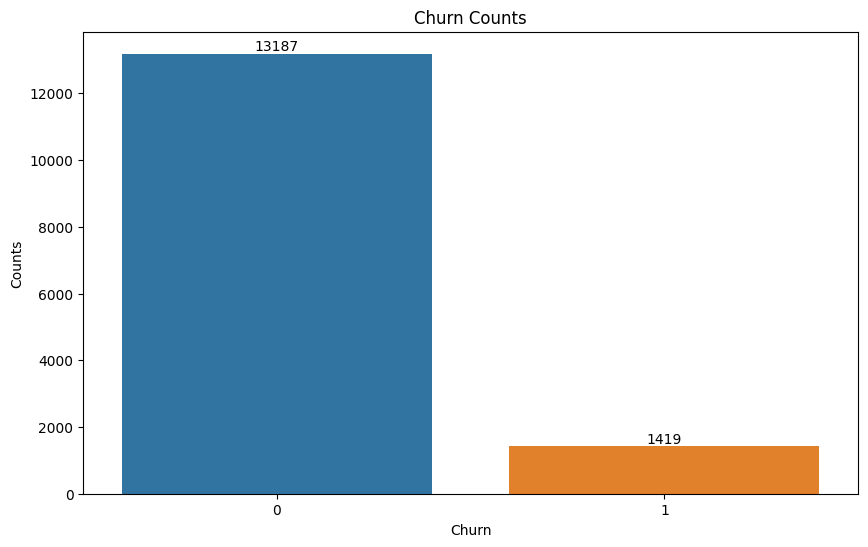

In [18]:
# Let's plot above data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='churn', data=client_data)
abs_val = client_data['churn'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_val)
plt.xlabel("Churn")
plt.ylabel("Counts")
plt.title("Churn Counts")
plt.show()

As you can see from above countplot the the number of clients that has been churned are 1419.

Let's visualize the code of the sales channel.

In [19]:
client_data.groupby(['channel_sales', 'churn'])['churn'].count().sort_values(ascending=False)

channel_sales                     churn
foosdfpfkusacimwkcsosbicdxkicaua  0        5934
MISSING                           0        3442
lmkebamcaaclubfxadlmueccxoimlema  0        1740
usilxuppasemubllopkaafesmlibmsdf  0        1237
foosdfpfkusacimwkcsosbicdxkicaua  1         820
ewpakwlliwisiwduibdlfmalxowmwpci  0         818
MISSING                           1         283
usilxuppasemubllopkaafesmlibmsdf  1         138
lmkebamcaaclubfxadlmueccxoimlema  1         103
ewpakwlliwisiwduibdlfmalxowmwpci  1          75
sddiedcslfslkckwlfkdpoeeailfpeds  0          11
epumfxlbckeskwekxbiuasklxalciiuu  0           3
fixdbufsefwooaasfcxdxadsiekoceaa  0           2
Name: churn, dtype: int64

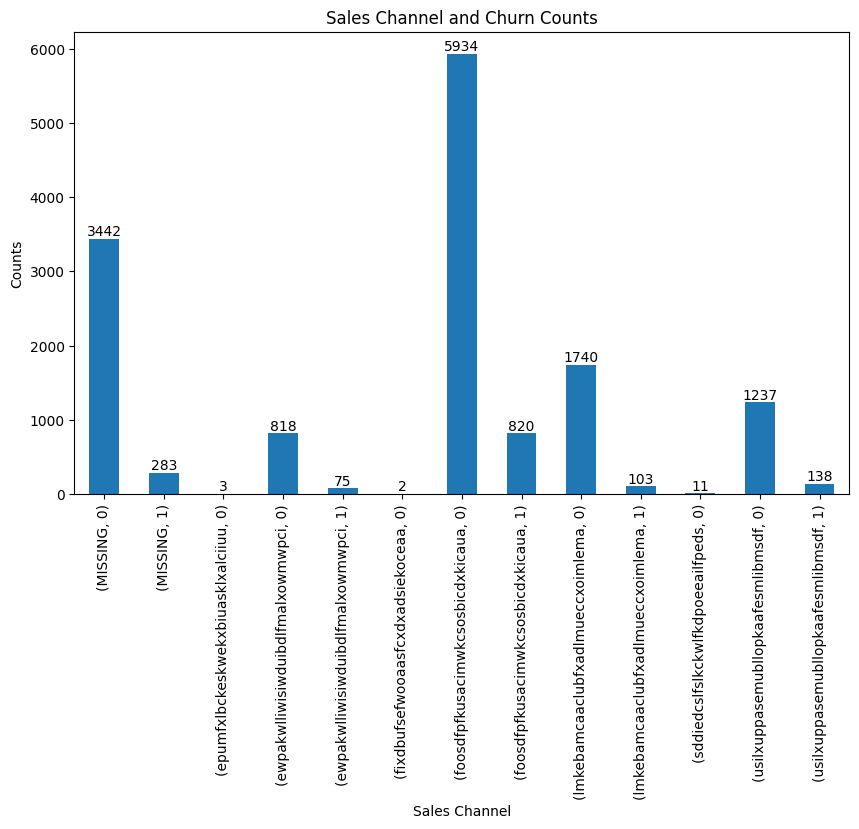

In [20]:
# Let's visualize above data using the countplot
plt.figure(figsize=(10,6))
ax = client_data.groupby(['channel_sales', 'churn'])['churn'].count().plot(kind='bar')
abs_val = client_data.groupby(['channel_sales', 'churn'])['churn'].count().values
ax.bar_label(container=ax.containers[0], labels=abs_val)
plt.xlabel("Sales Channel")
plt.ylabel("Counts")
plt.title("Sales Channel and Churn Counts")
plt.show()

Let's see the electricity consumption of the past 12 months of the clients which did not churned.

In [21]:
not_churned = client_data[client_data['churn']==0]
not_churned['churn'].value_counts()

0    13187
Name: churn, dtype: int64

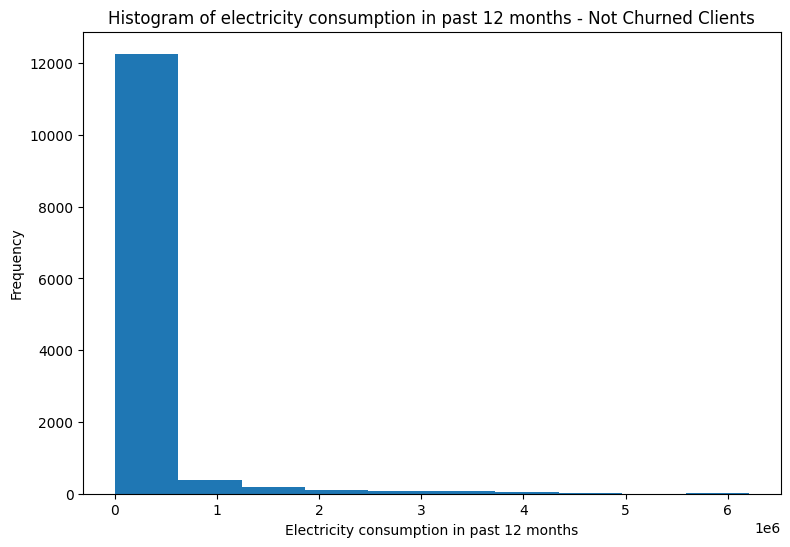

In [22]:
plt.figure(figsize=(9,6))
not_churned['cons_12m'].plot(kind='hist')
plt.xlabel('Electricity consumption in past 12 months')
plt.ylabel('Frequency')
plt.title("Histogram of electricity consumption in past 12 months - Not Churned Clients")
plt.show()

Let's see the electricity consumption of the past 12 months of the clients which are churned.

In [23]:
churned = client_data[client_data['churn']==1]
churned['churn'].value_counts()

1    1419
Name: churn, dtype: int64

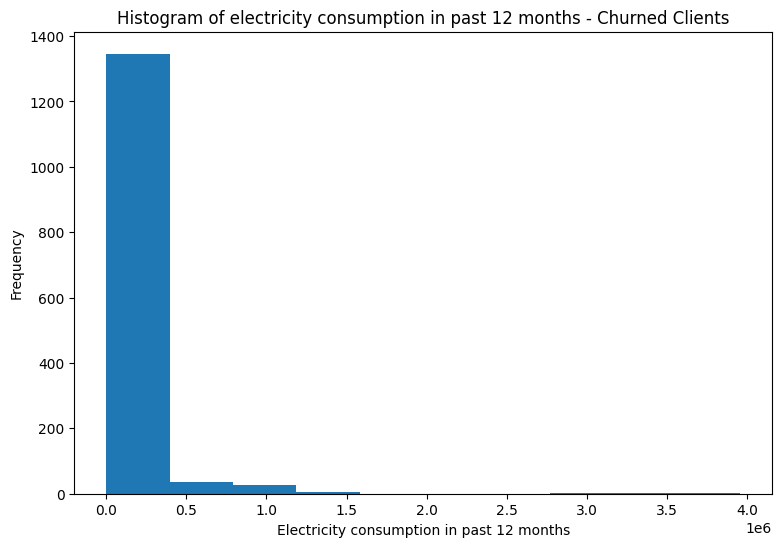

In [24]:
plt.figure(figsize=(9,6))
churned['cons_12m'].plot(kind='hist')
plt.xlabel('Electricity consumption in past 12 months')
plt.ylabel('Frequency')
plt.title("Histogram of electricity consumption in past 12 months - Churned Clients")
plt.show()

As you can see from above 2 histograms the we got a positively skewed distribution in each cases.

Now we will see the distribution for clients who also used gas.

In [25]:
gas_clients = client_data[client_data['has_gas']=='t']
gas_clients['has_gas'].value_counts()

t    2651
Name: has_gas, dtype: int64

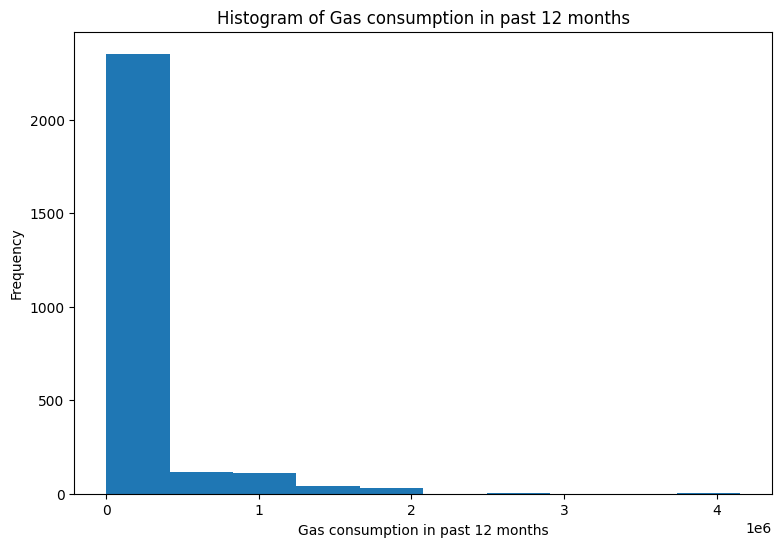

In [26]:
plt.figure(figsize=(9,6))
gas_clients['cons_gas_12m'].plot(kind='hist')
plt.xlabel('Gas consumption in past 12 months')
plt.ylabel('Frequency')
plt.title("Histogram of Gas consumption in past 12 months")
plt.show()

Now we will see the distribution of consumption of electricity in last month for churned as well as non-churned clients.

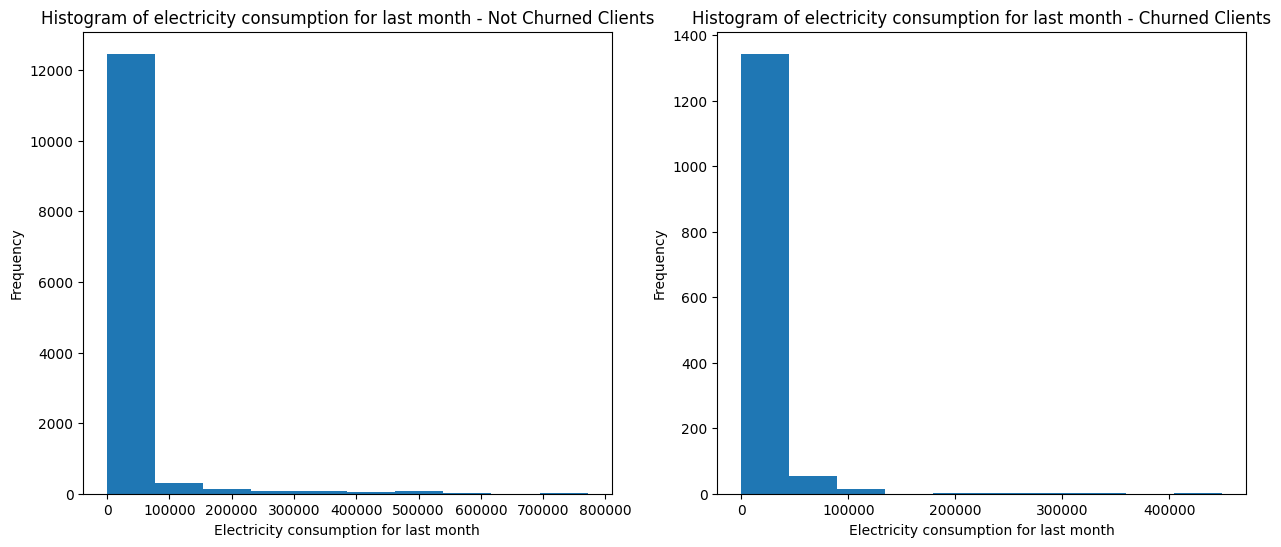

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(121)
not_churned['cons_last_month'].plot(kind='hist')
plt.xlabel('Electricity consumption for last month')
plt.ylabel('Frequency')
plt.title("Histogram of electricity consumption for last month - Not Churned Clients")

plt.subplot(122)
churned['cons_last_month'].plot(kind='hist')
plt.xlabel('Electricity consumption for last month')
plt.ylabel('Frequency')
plt.title("Histogram of electricity consumption for last month - Churned Clients")

plt.show()

Forecasted Electricity Consumption for next 12 Months - Churned and Non-Churned Clients.

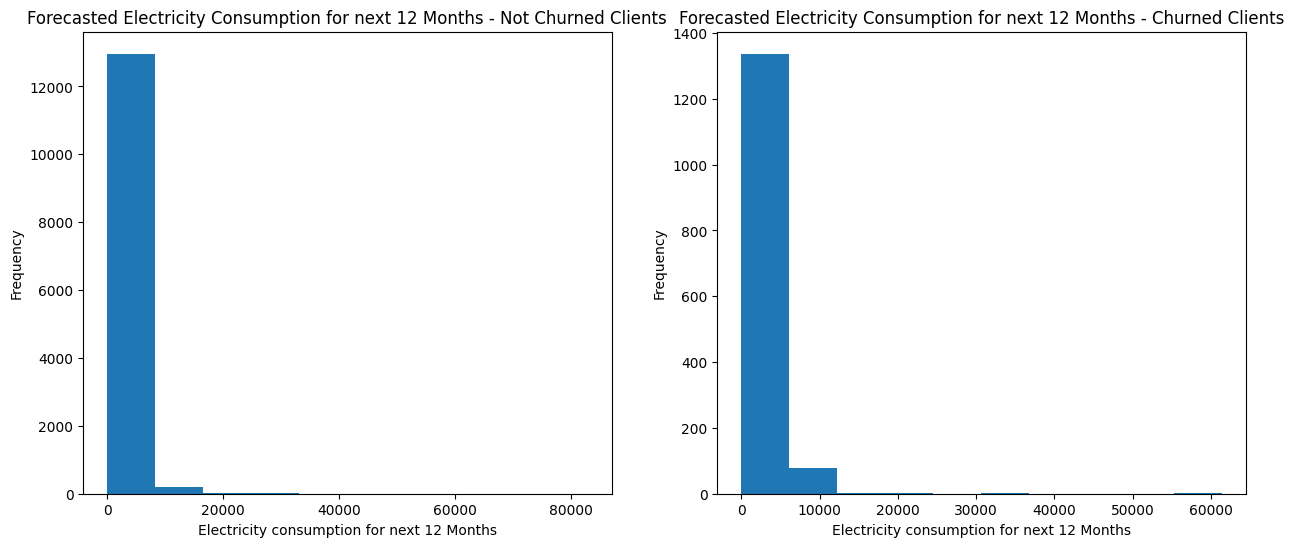

In [28]:
plt.figure(figsize=(15,6))

plt.subplot(121)
not_churned['forecast_cons_12m'].plot(kind='hist')
plt.xlabel('Electricity consumption for next 12 Months')
plt.ylabel('Frequency')
plt.title("Forecasted Electricity Consumption for next 12 Months - Not Churned Clients")

plt.subplot(122)
churned['forecast_cons_12m'].plot(kind='hist')
plt.xlabel('Electricity consumption for next 12 Months')
plt.ylabel('Frequency')
plt.title("Forecasted Electricity Consumption for next 12 Months - Churned Clients")

plt.show()

Forecasted Electricity Consumption for next Calendar Year - Churned and Non-Churned Clients.

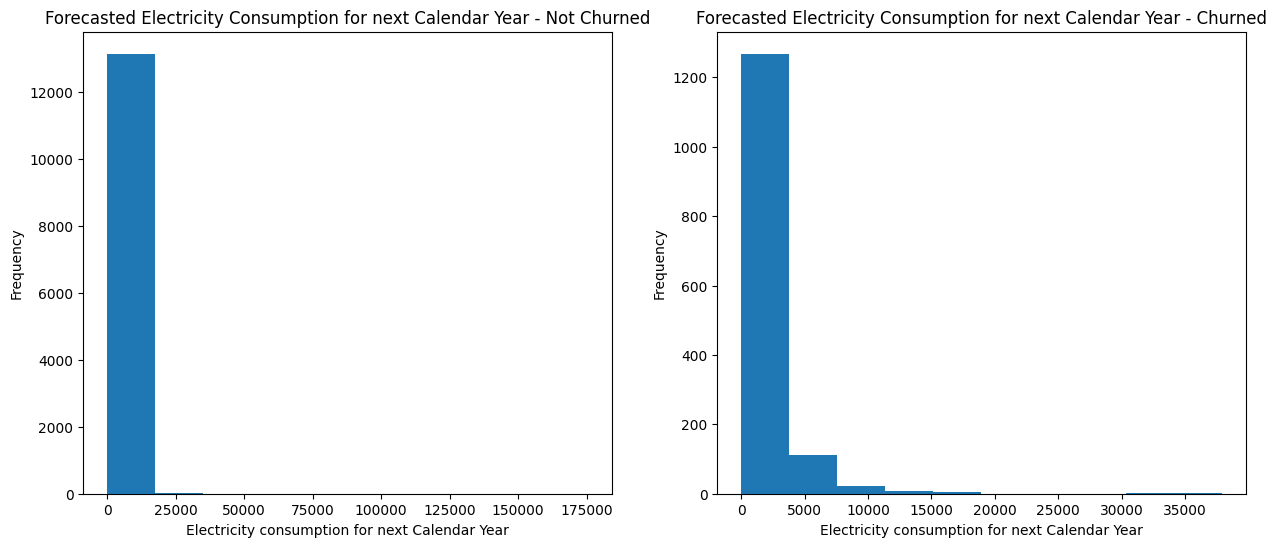

In [29]:
plt.figure(figsize=(15,6))

plt.subplot(121)
not_churned['forecast_cons_year'].plot(kind='hist')
plt.xlabel('Electricity consumption for next Calendar Year')
plt.ylabel('Frequency')
plt.title("Forecasted Electricity Consumption for next Calendar Year - Not Churned")

plt.subplot(122)
churned['forecast_cons_year'].plot(kind='hist')
plt.xlabel('Electricity consumption for next Calendar Year')
plt.ylabel('Frequency')
plt.title("Forecasted Electricity Consumption for next Calendar Year - Churned")

plt.show()

Code of the Electricity Campaign the Customer First Subscribed To Analysis

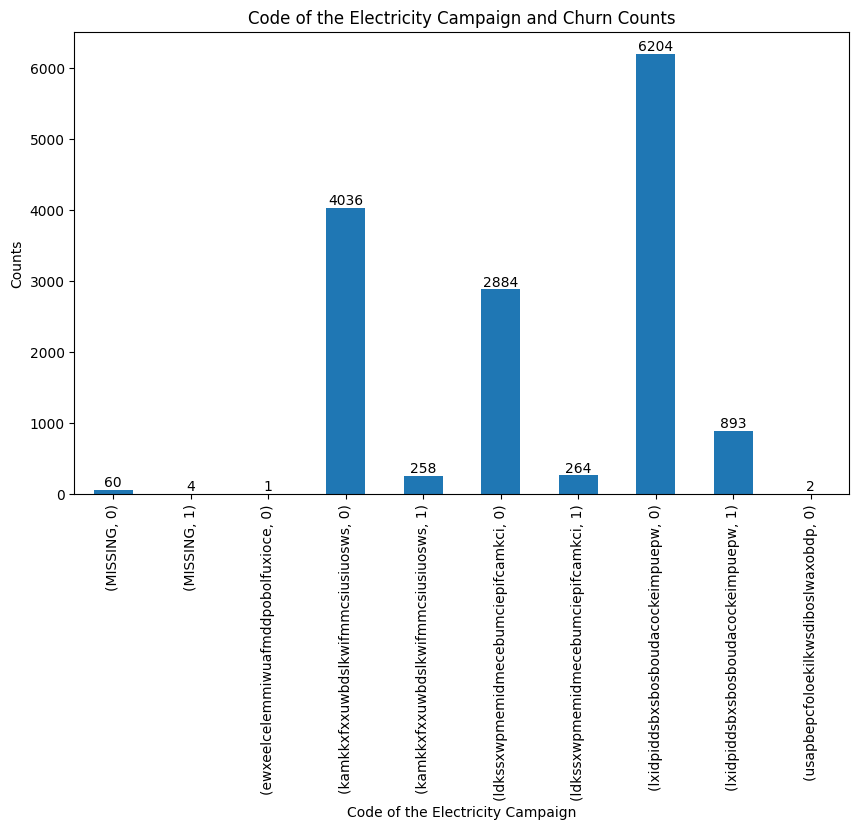

In [30]:
plt.figure(figsize=(10,6))
ax = client_data.groupby(['origin_up', 'churn'])['churn'].count().plot(kind='bar')
abs_val = client_data.groupby(['origin_up', 'churn'])['churn'].count().values
ax.bar_label(container=ax.containers[0], labels=abs_val)
plt.xlabel("Code of the Electricity Campaign")
plt.ylabel("Counts")
plt.title("Code of the Electricity Campaign and Churn Counts")
plt.show()

Number of Active Products and Services.

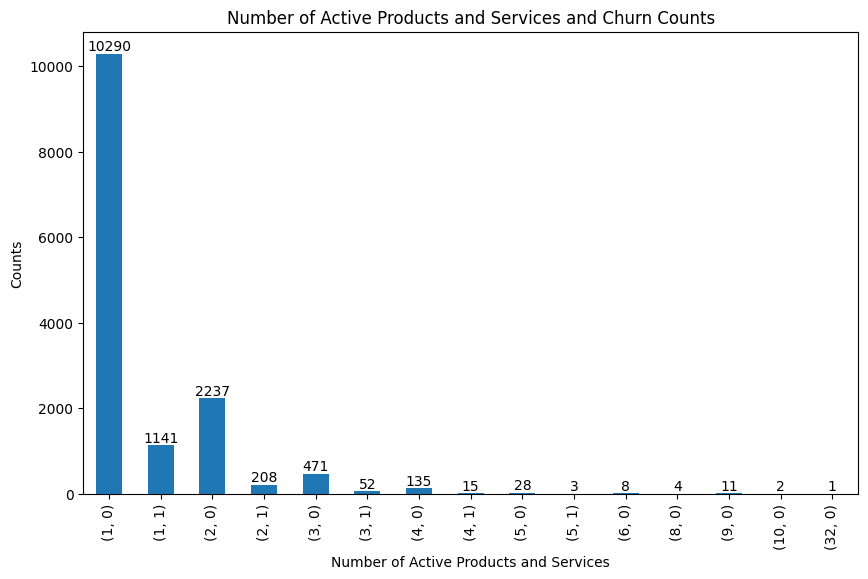

In [31]:
plt.figure(figsize=(10,6))
ax = client_data.groupby(['nb_prod_act', 'churn'])['churn'].count().plot(kind='bar')
abs_val = client_data.groupby(['nb_prod_act', 'churn'])['churn'].count().values
ax.bar_label(container=ax.containers[0], labels=abs_val)
plt.xlabel("Number of Active Products and Services")
plt.ylabel("Counts")
plt.title("Number of Active Products and Services and Churn Counts")
plt.show()

Subscribed Power

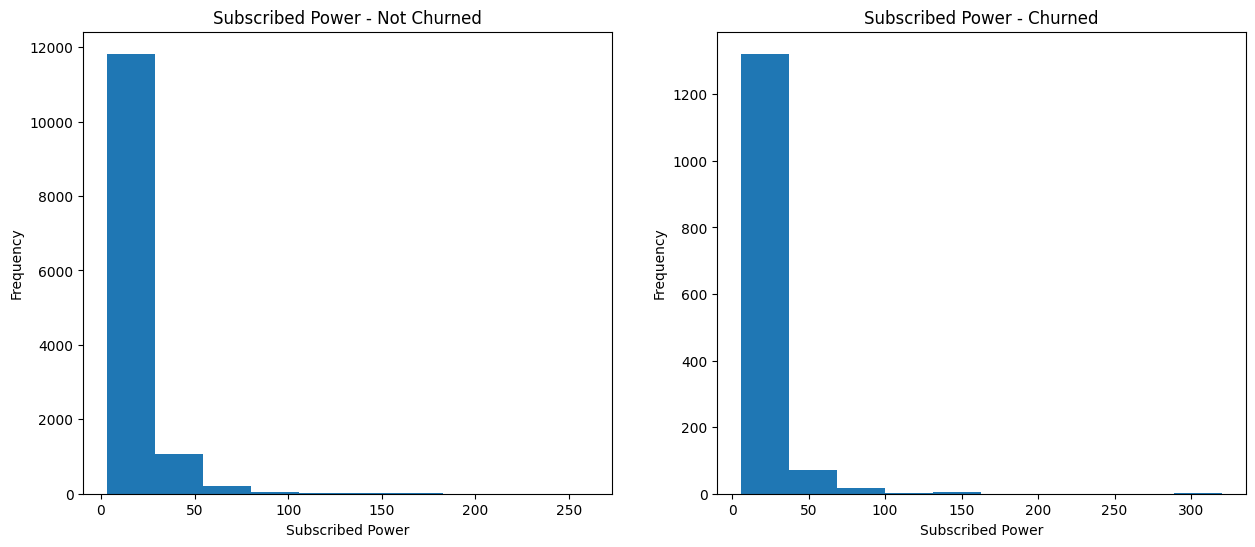

In [32]:
plt.figure(figsize=(15,6))

plt.subplot(121)
not_churned['pow_max'].plot(kind='hist')
plt.xlabel('Subscribed Power')
plt.ylabel('Frequency')
plt.title("Subscribed Power - Not Churned")

plt.subplot(122)
churned['pow_max'].plot(kind='hist')
plt.xlabel('Subscribed Power')
plt.ylabel('Frequency')
plt.title("Subscribed Power - Churned")

plt.show()

In [33]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

#### Churn

In [35]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'Churn']
churn_total = churn.groupby(churn['Churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

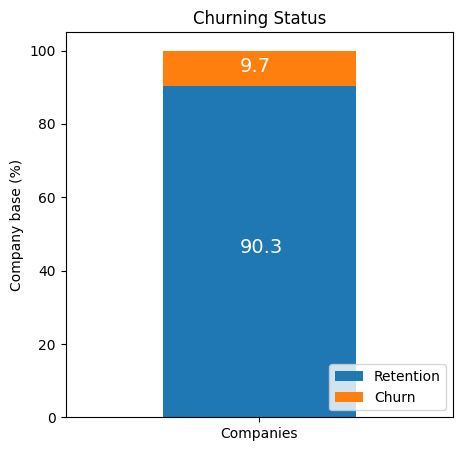

In [38]:
plot_stacked_bars(churn_percentage.transpose(), "Churning Status", (5,5), legend_="lower right")

About 10% of the total customers have churned.

#### Sales Channel

In [40]:
channel = client_data[['id', 'channel_sales', 'churn']]
channel = channel.groupby(['channel_sales', 'churn'])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

In [41]:
channel

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


In [42]:
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


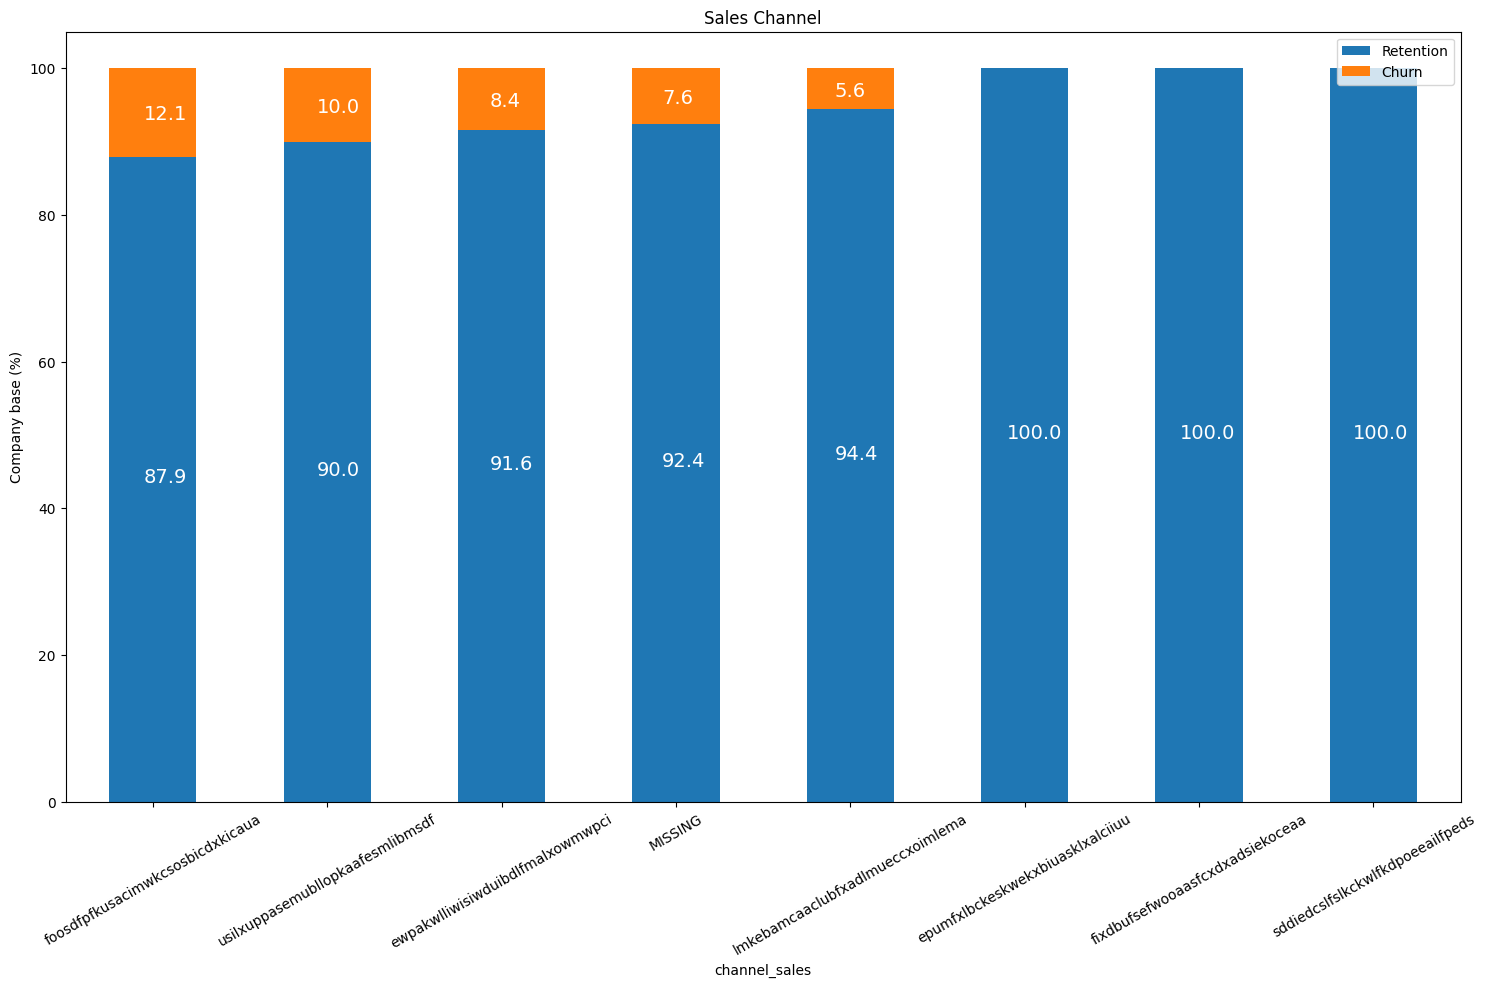

In [43]:
plot_stacked_bars(channel_churn, 'Sales Channel', rot_=30)

Interestingly, the churning customers are distributed over 5 different values for channel_sales. As well as this, the value of MISSING has a churn rate of 7.6%. MISSING indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

#### Consumption:
Let’s see the distribution of the consumption in the last year and month. Since the consumption
data is univariate, let’s use histograms to visualize their distribution.

In [44]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [46]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """Plot Variable Distribution in a stacked histogram of churned or retained company """
    # Create a temporary dataframe with data to be plot
    temp = pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[['Retention', 'Churn']].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change x-axis to plainstyle
    ax.ticklabel_format(style='plain', axis='x')

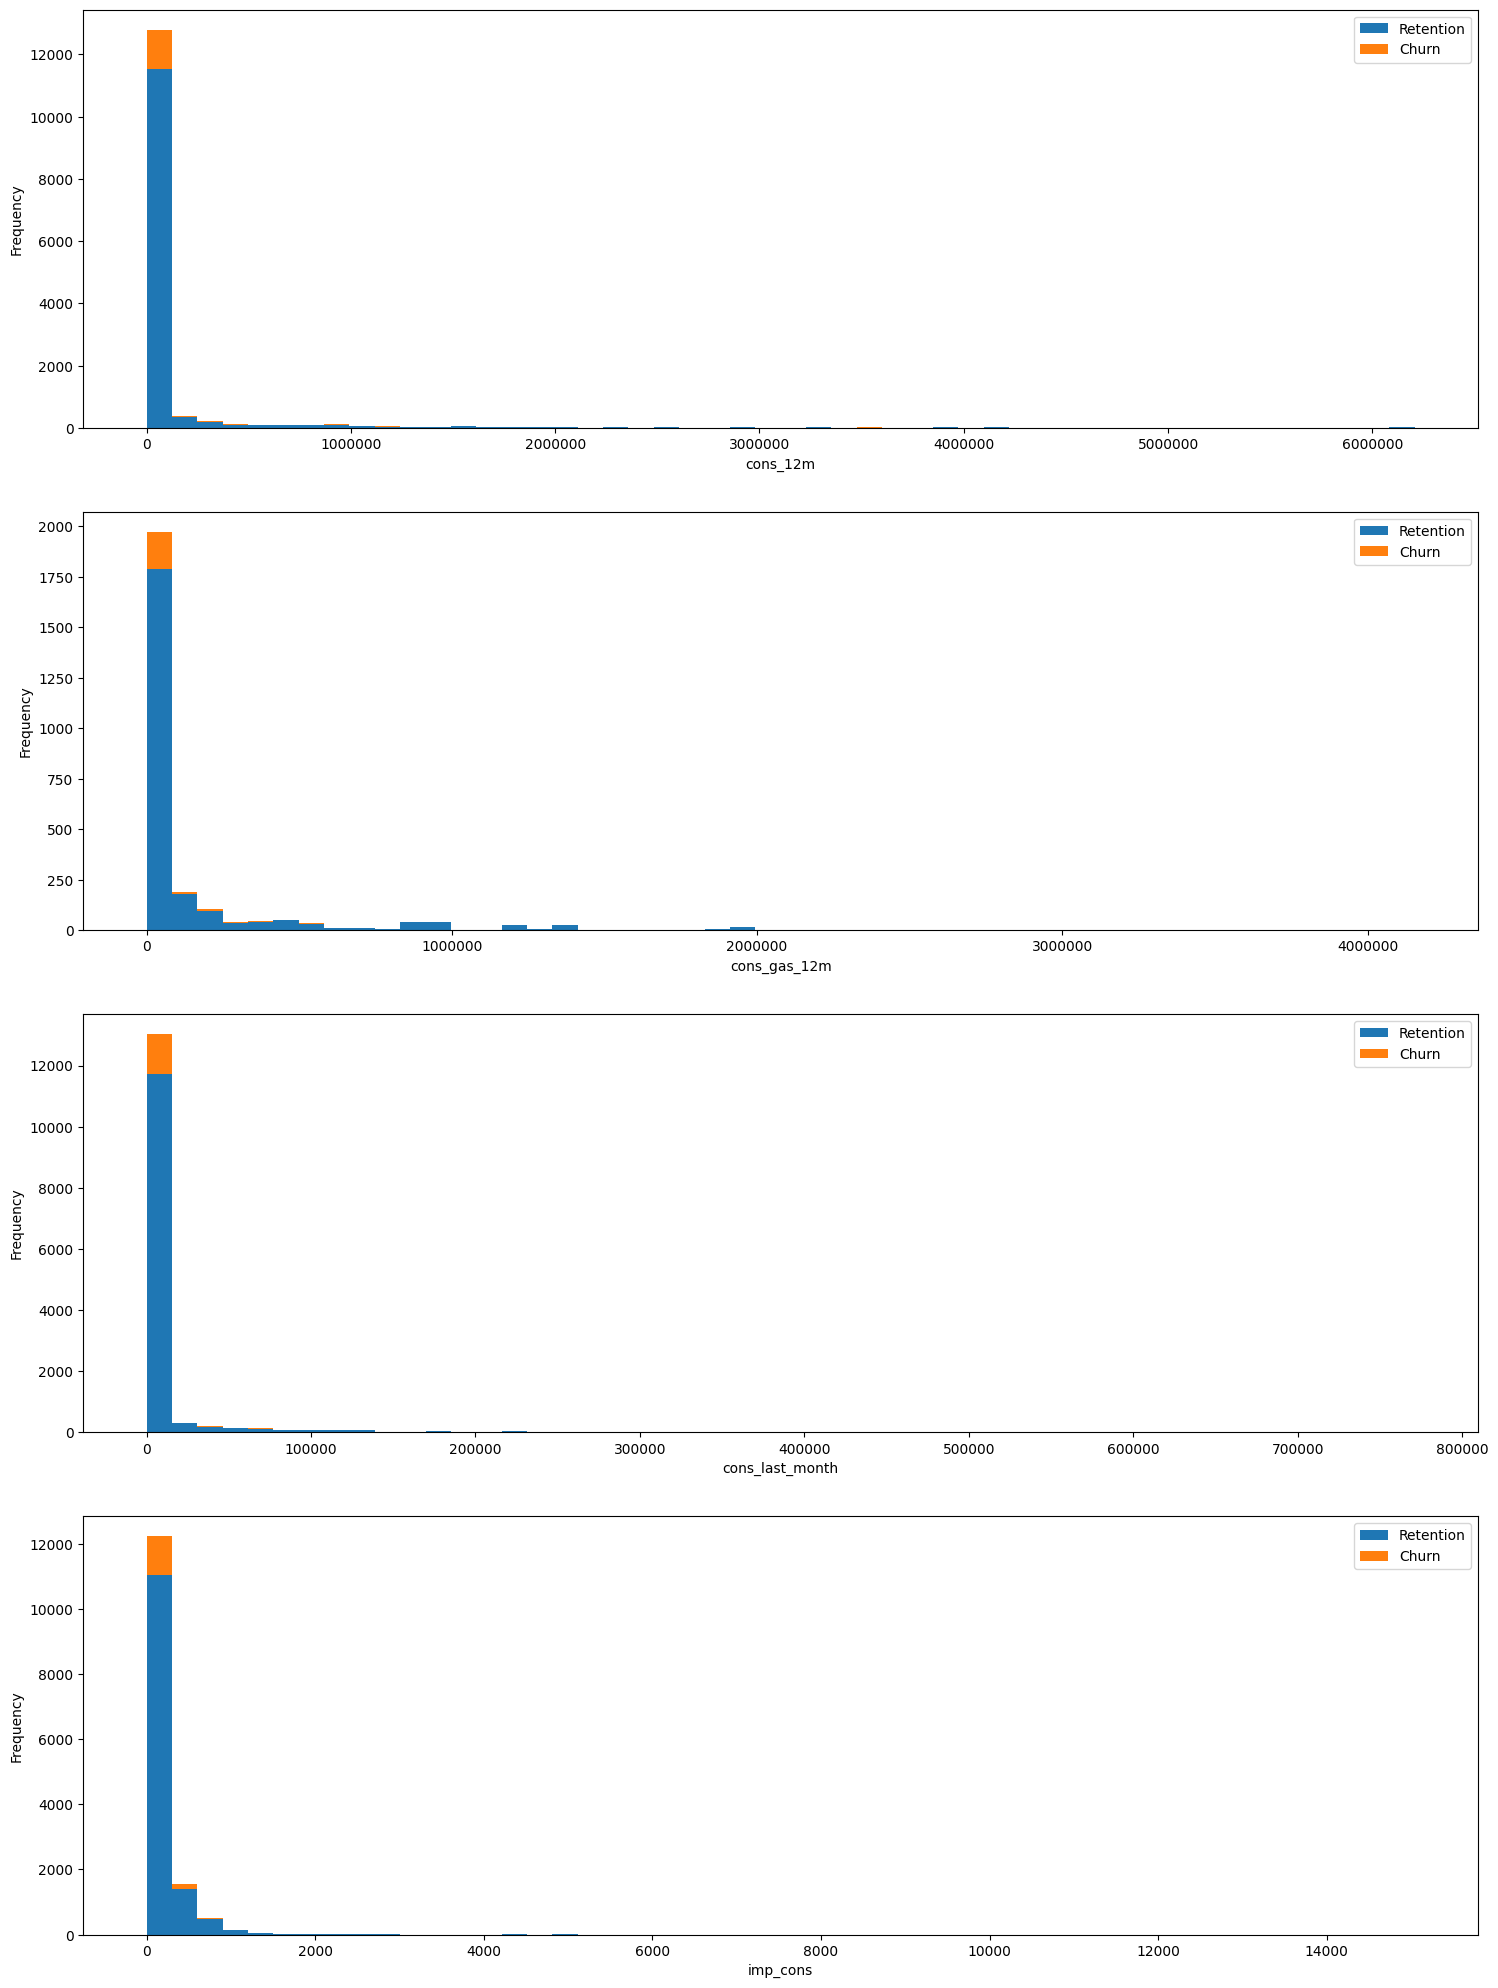

In [47]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary: - Minimum, - First quartile (Q1) - Median - Third quartile (Q3) - Maximum. It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anac

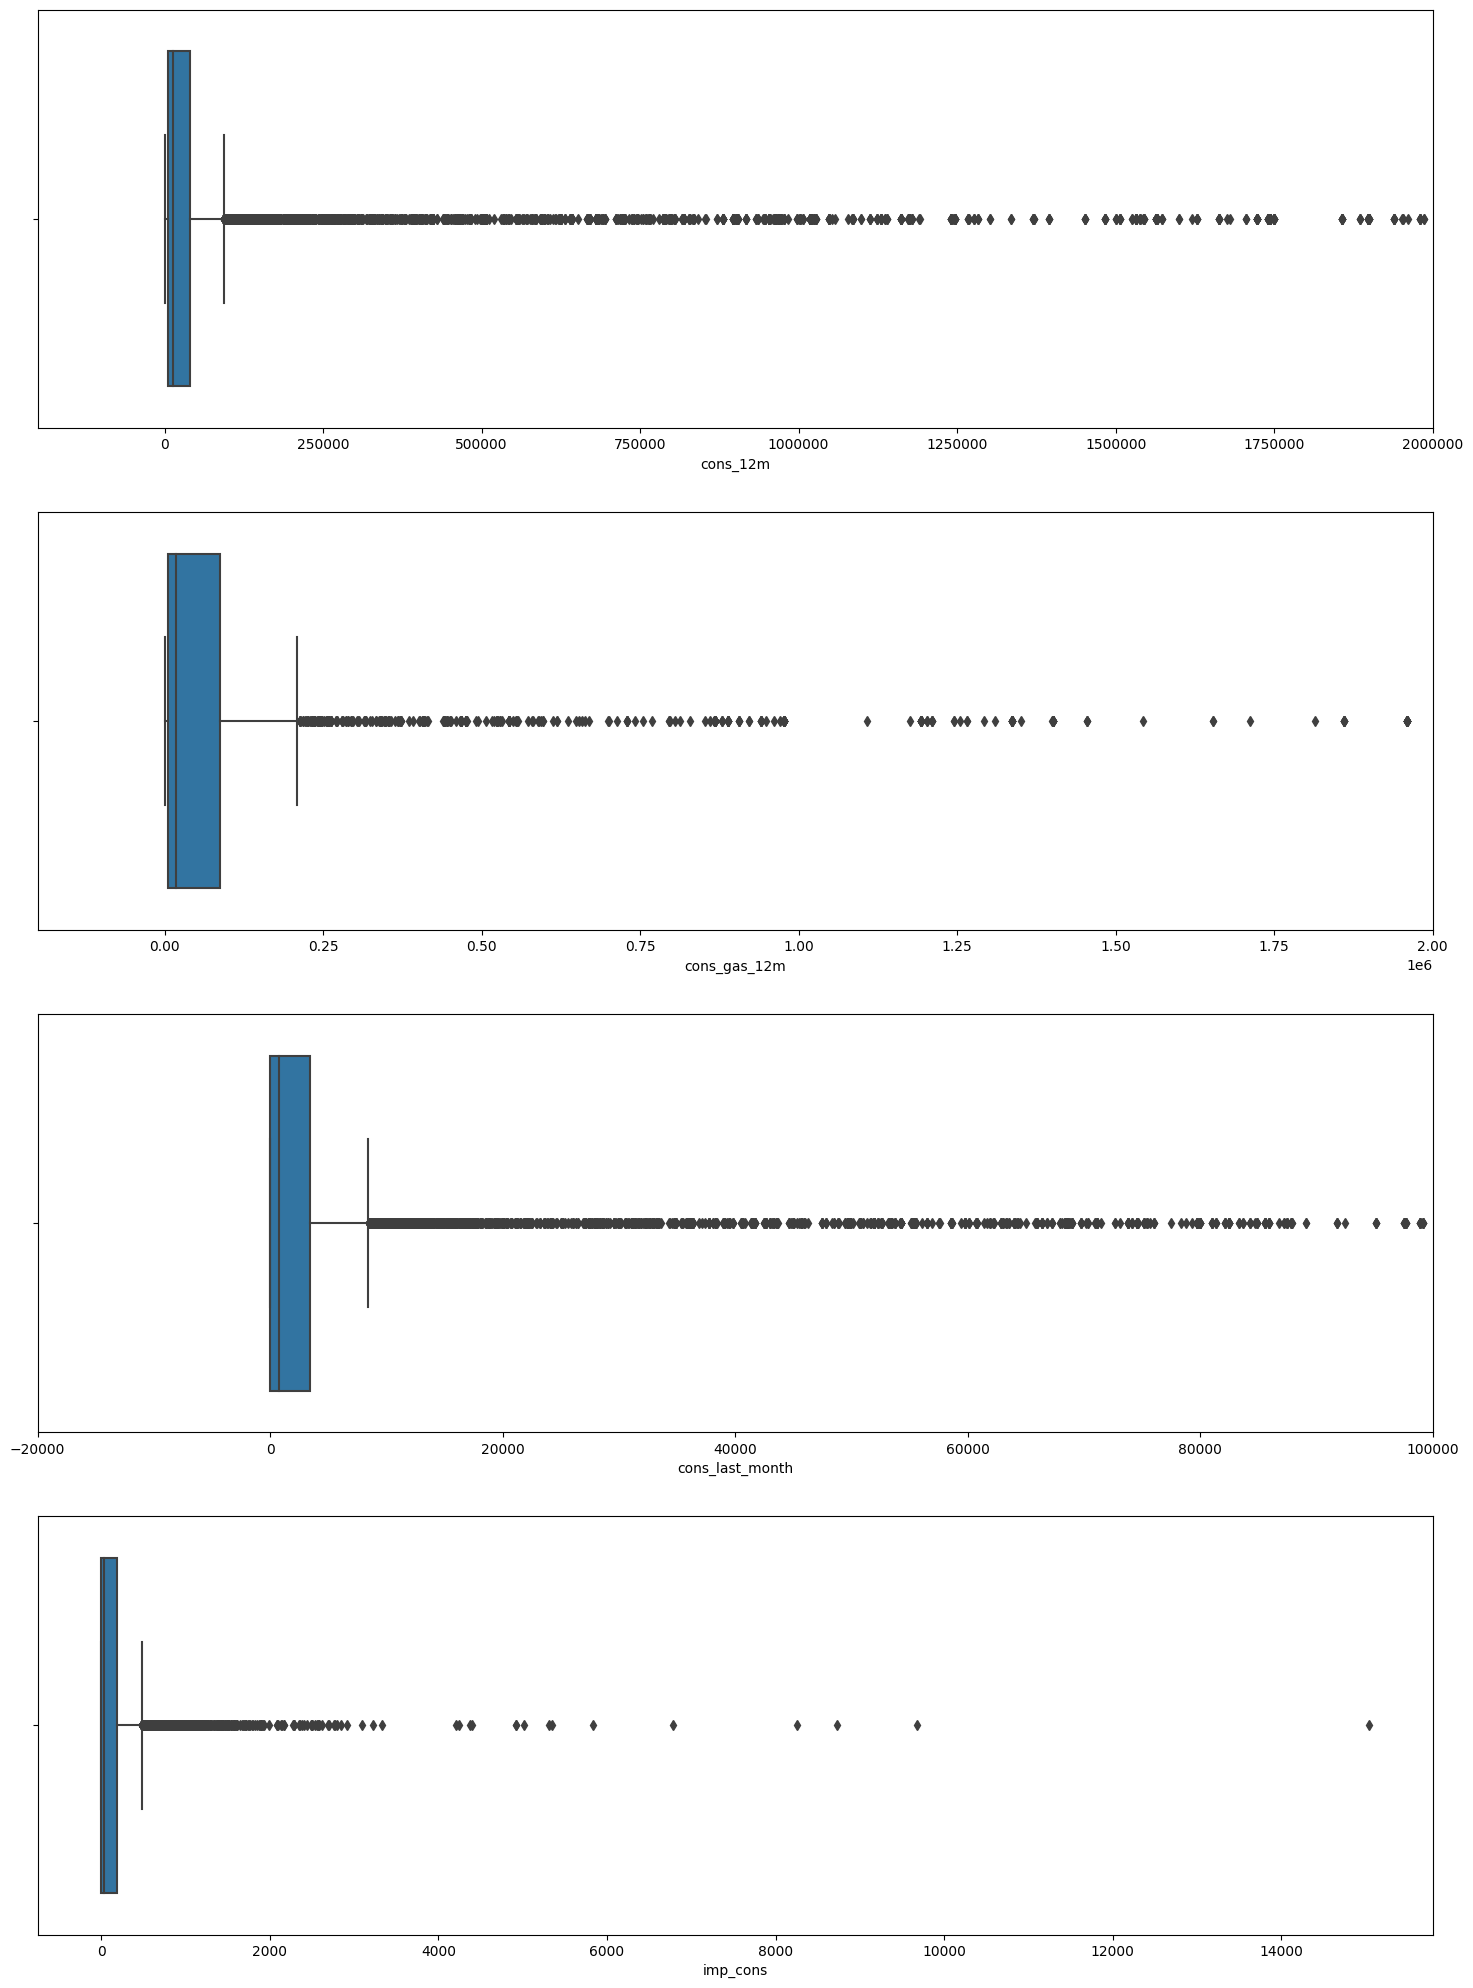

In [50]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"],ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
# Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

#### Forecast

In [52]:
forecast = client_data[["id", "forecast_cons_12m","forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
"forecast_price_energy_off_peak","forecast_price_energy_peak","forecast_price_pow_off_peak","churn"]]

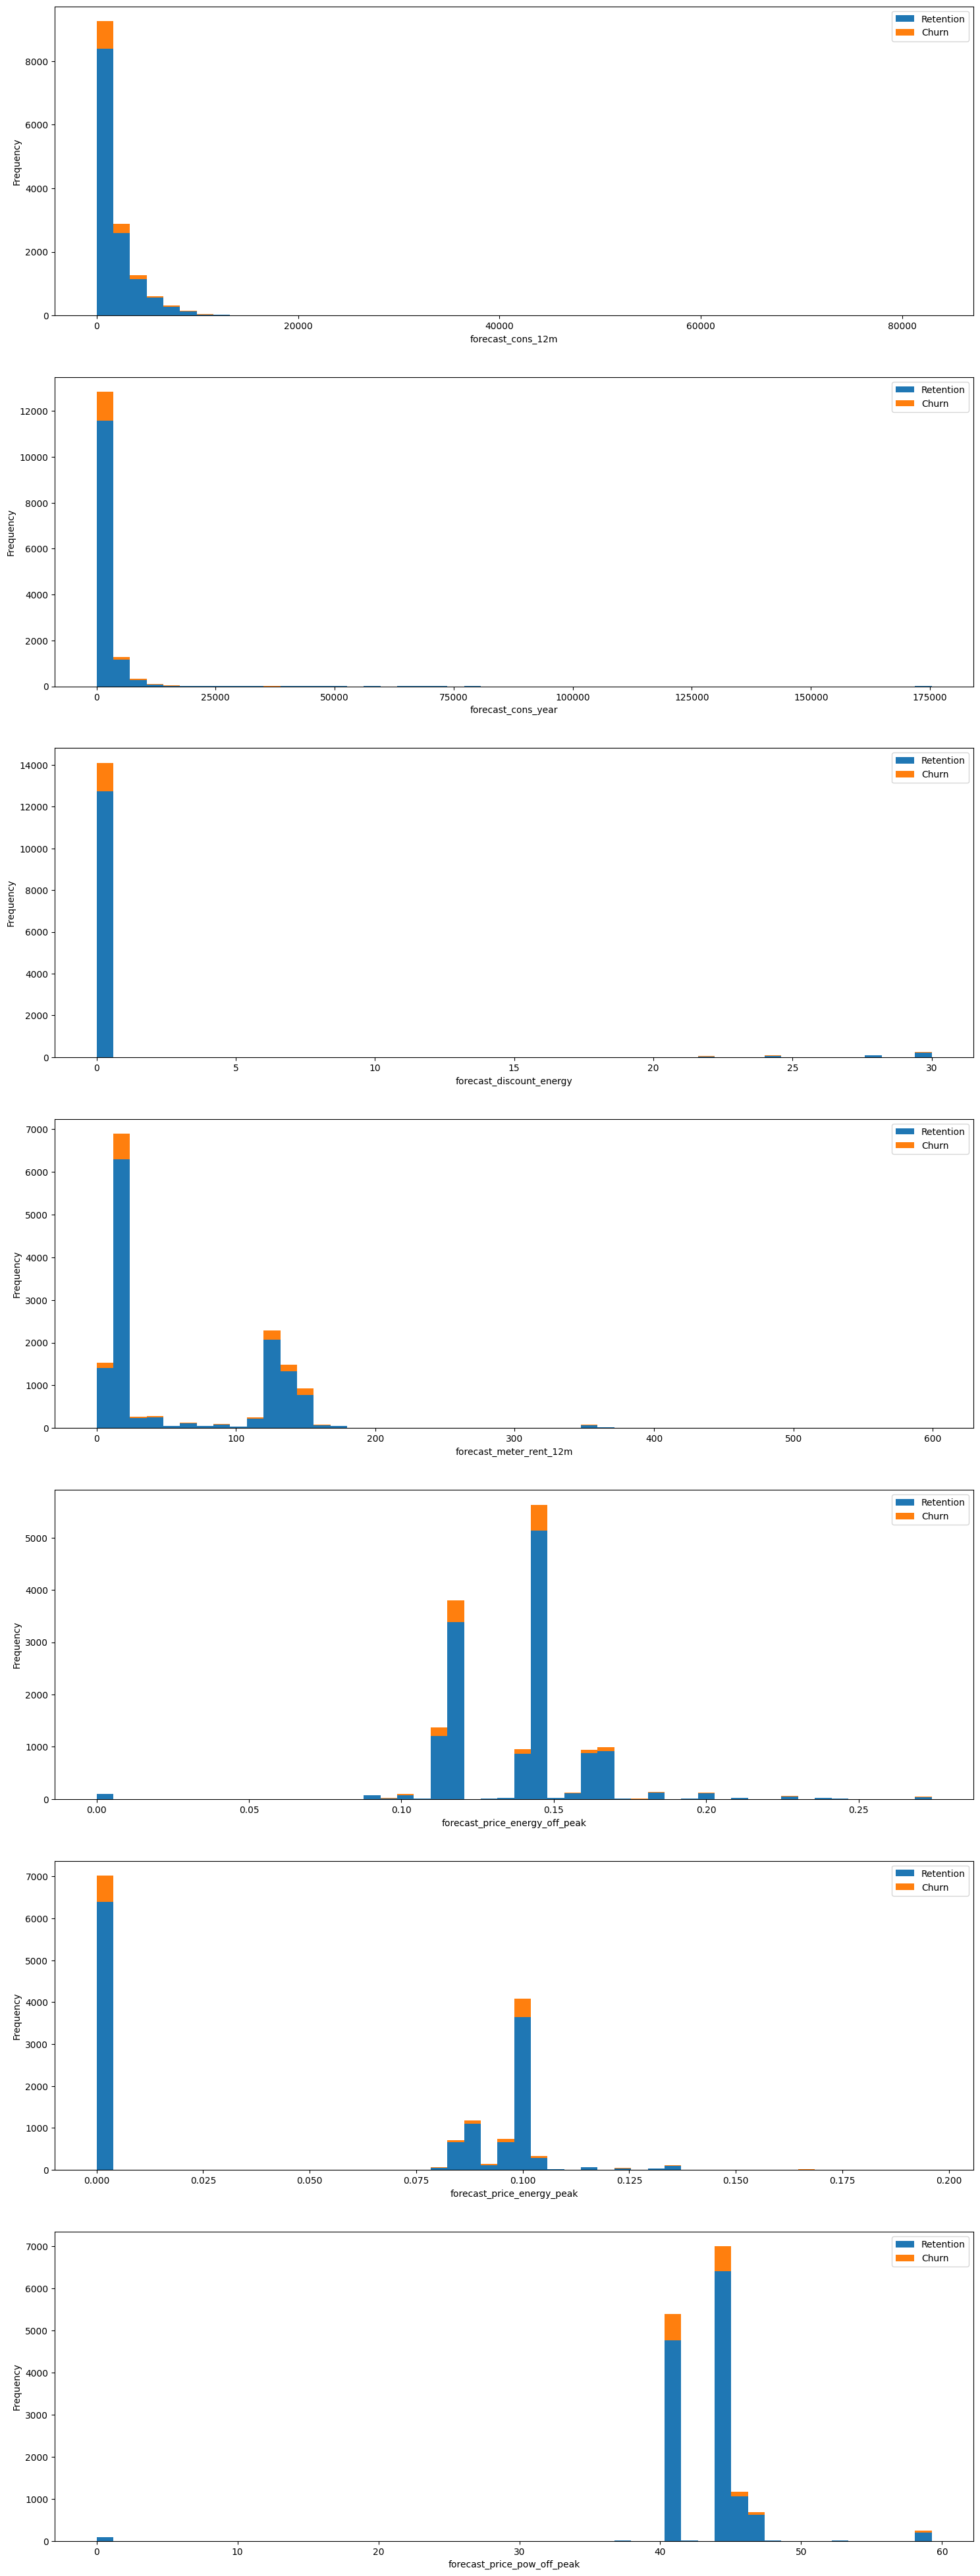

In [53]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values.

#### Contract Type

In [55]:
contract_type = client_data[['id', 'has_gas', 'churn']]
contract = contract_type.groupby(['churn','has_gas'])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

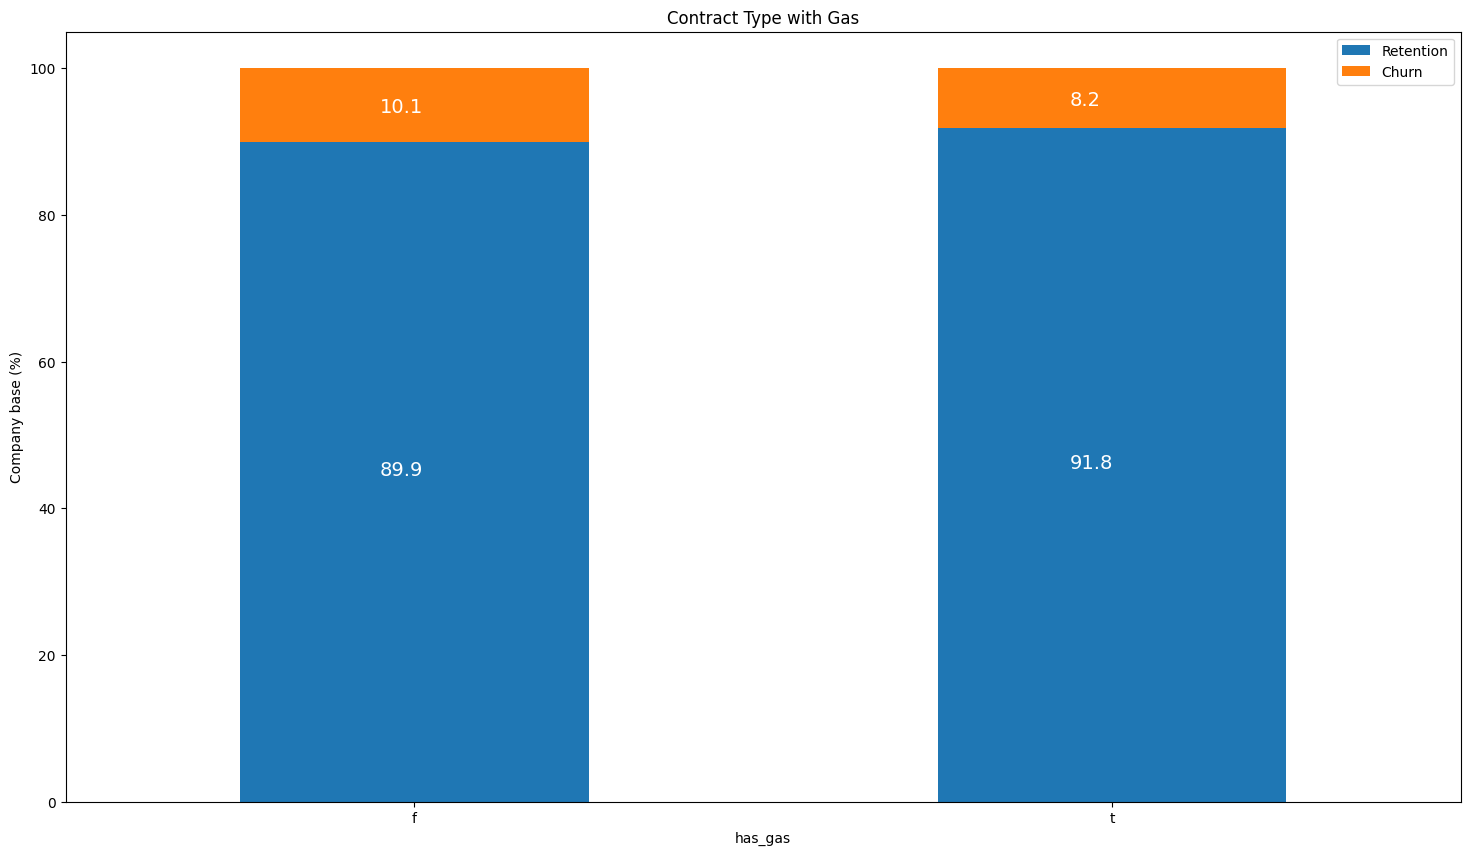

In [56]:
plot_stacked_bars(contract_percentage, "Contract Type with Gas")

#### Margin

In [57]:
margin = client_data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda\envs\machinelearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


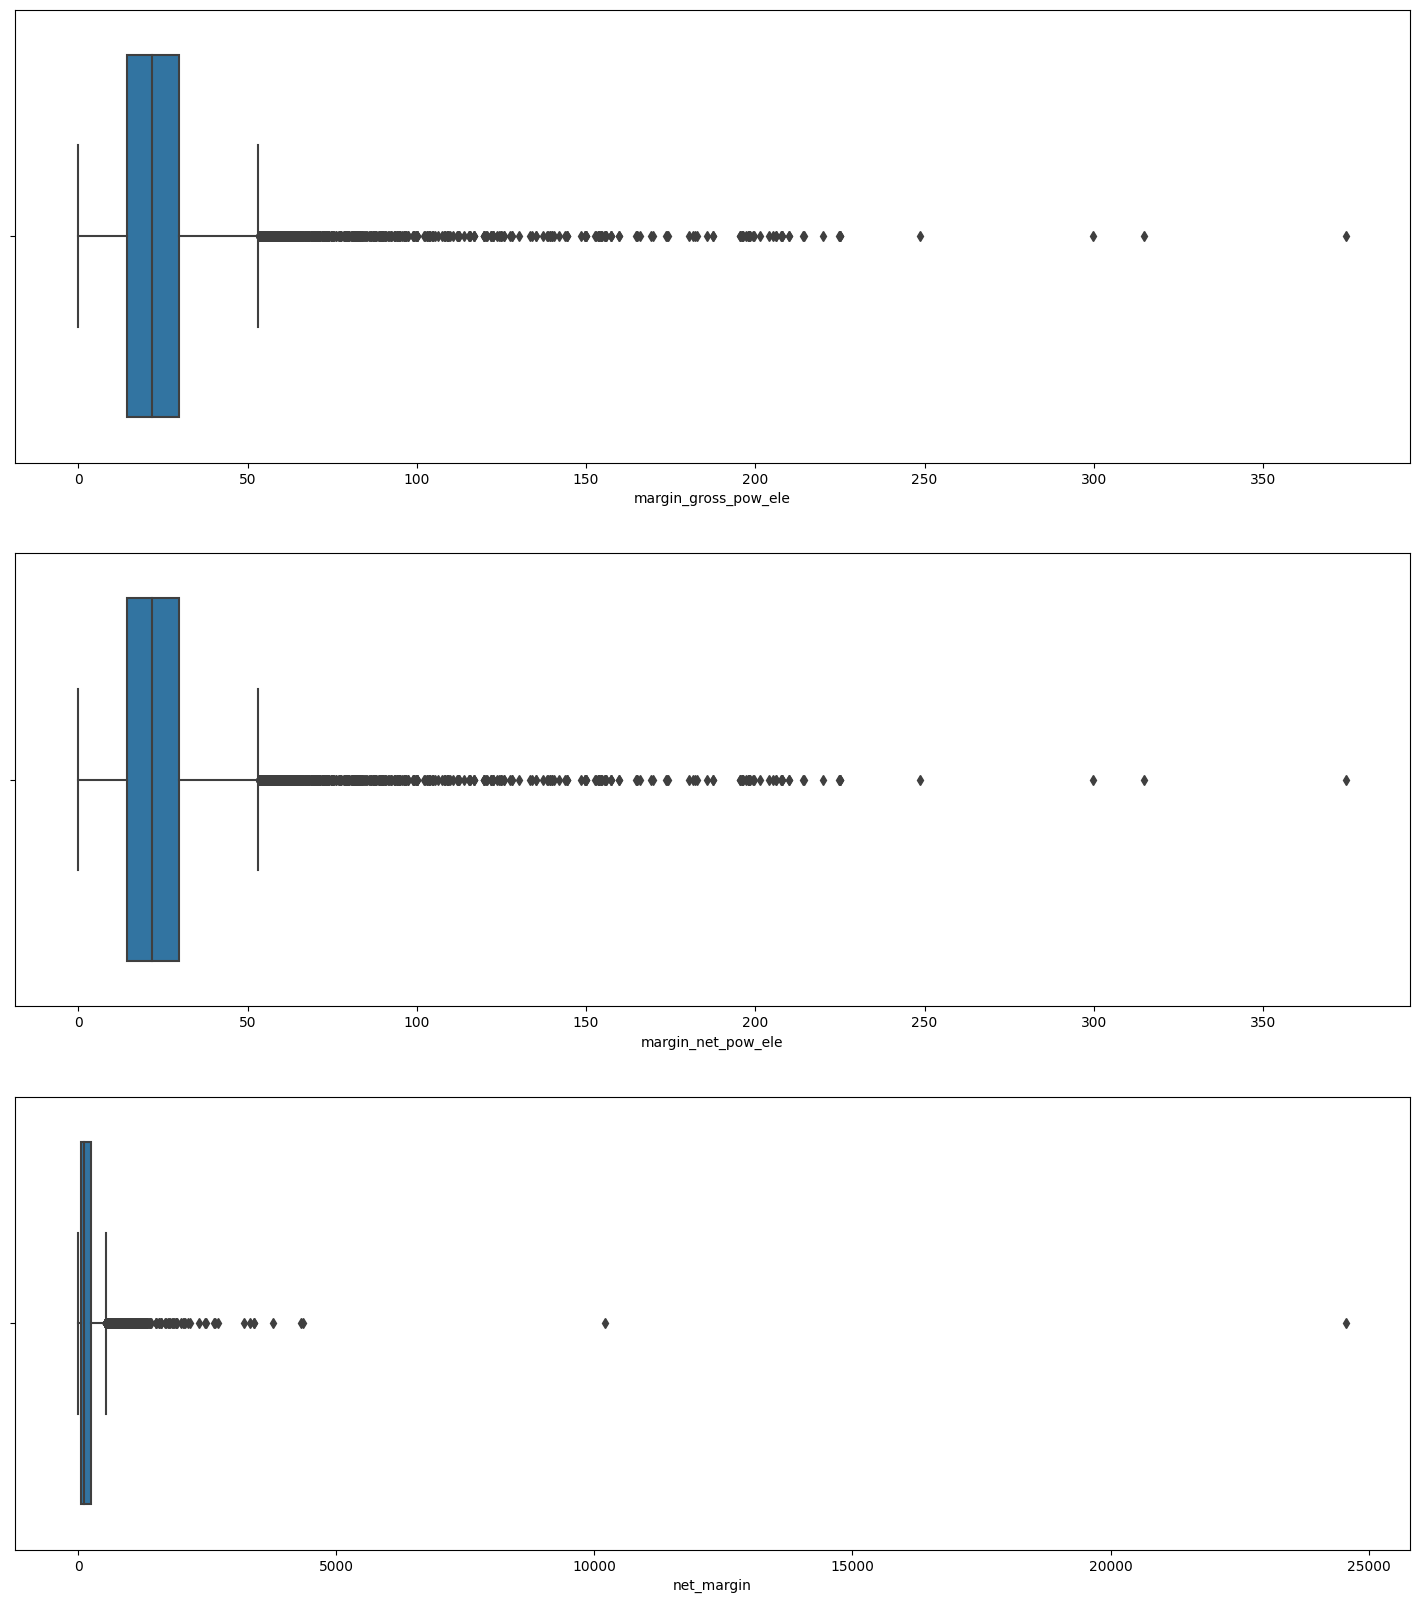

In [58]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

#### Subscribed Power

In [59]:
power = client_data[['id', 'pow_max', 'churn']]

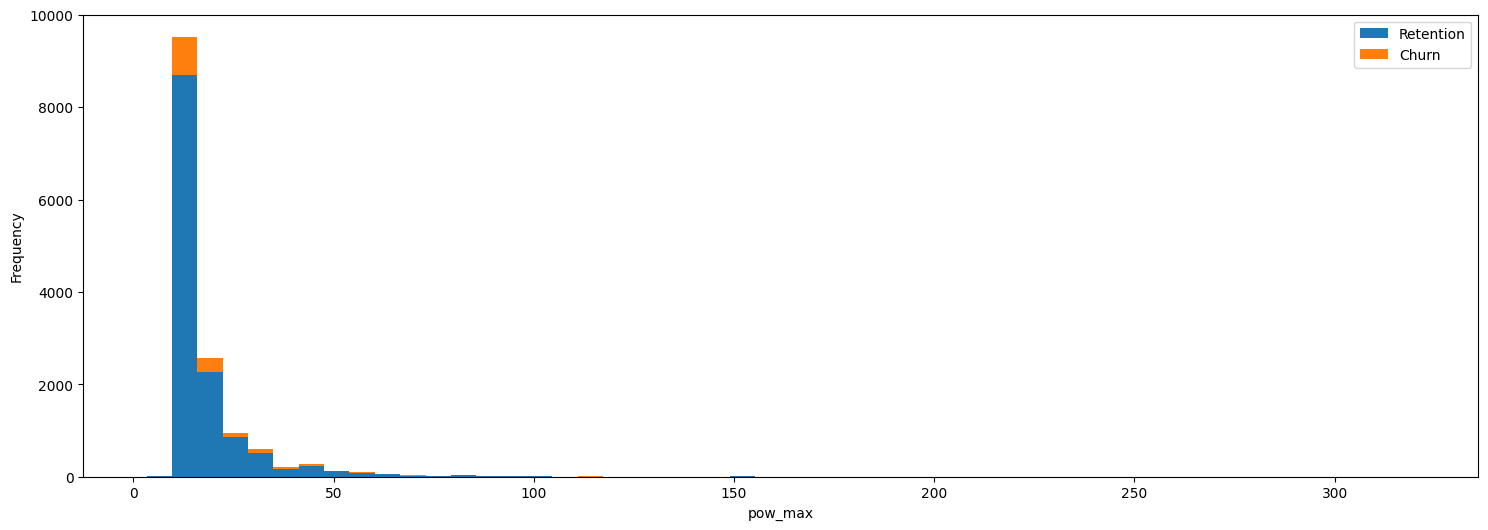

In [61]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 6))
plot_distribution(power, 'pow_max', axs)

#### Other Columns

In [62]:
others = client_data[['id', 'nb_prod_act', 'num_years_antig', 'origin_up','churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

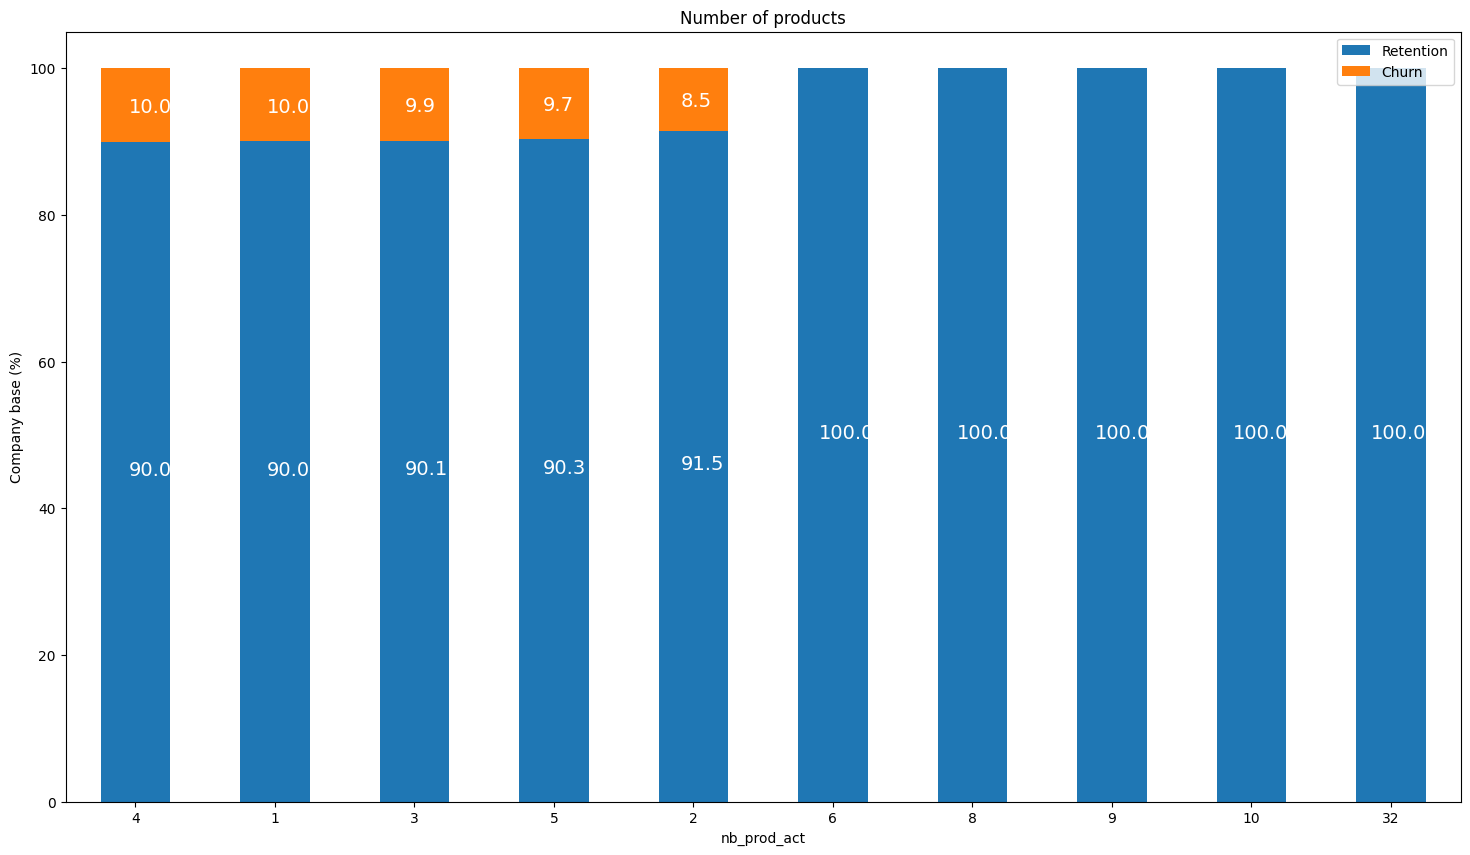

In [63]:
plot_stacked_bars(products_percentage, "Number of products")

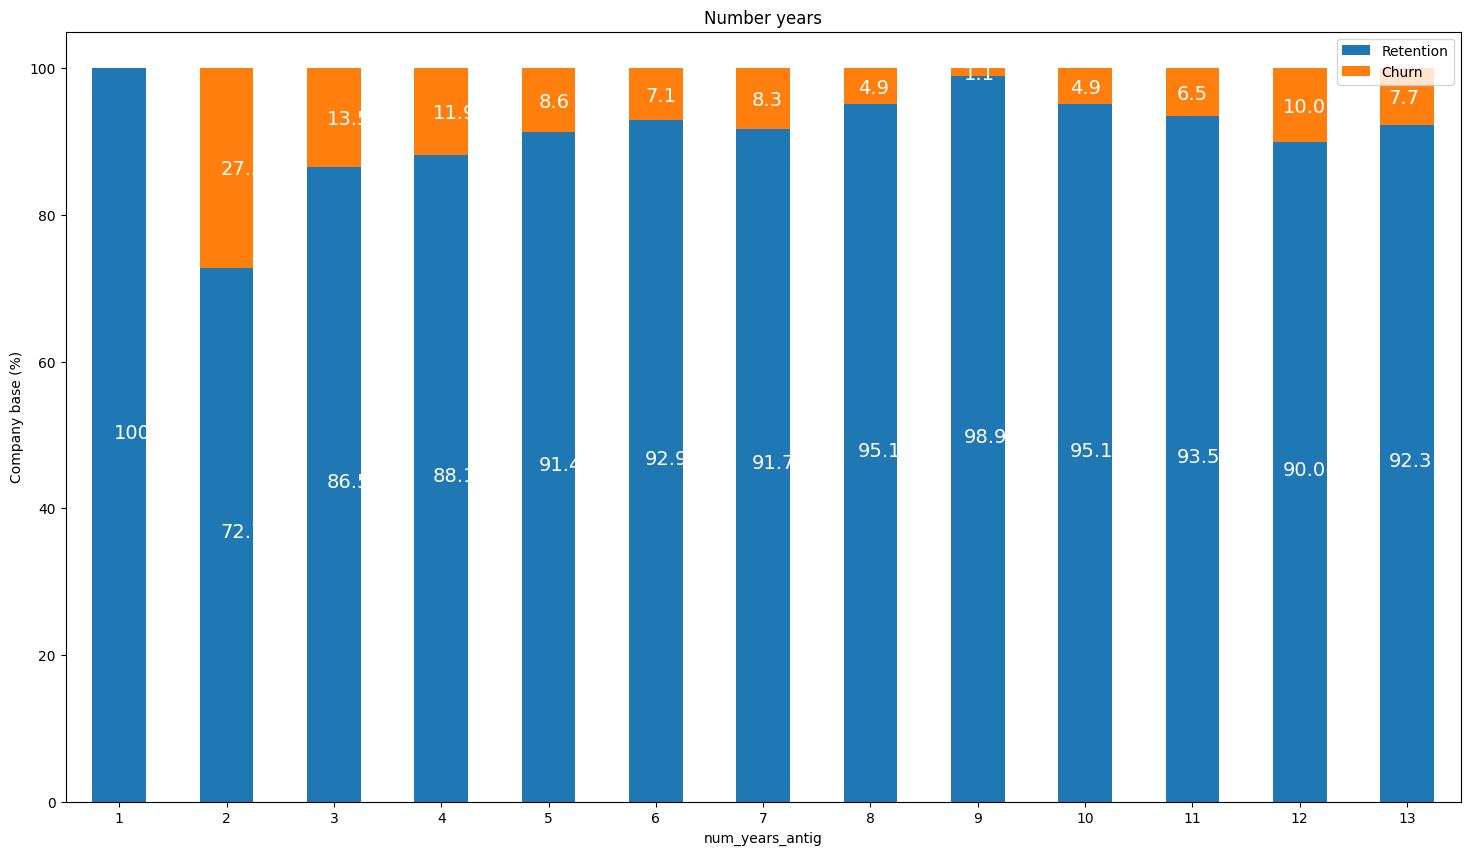

In [64]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

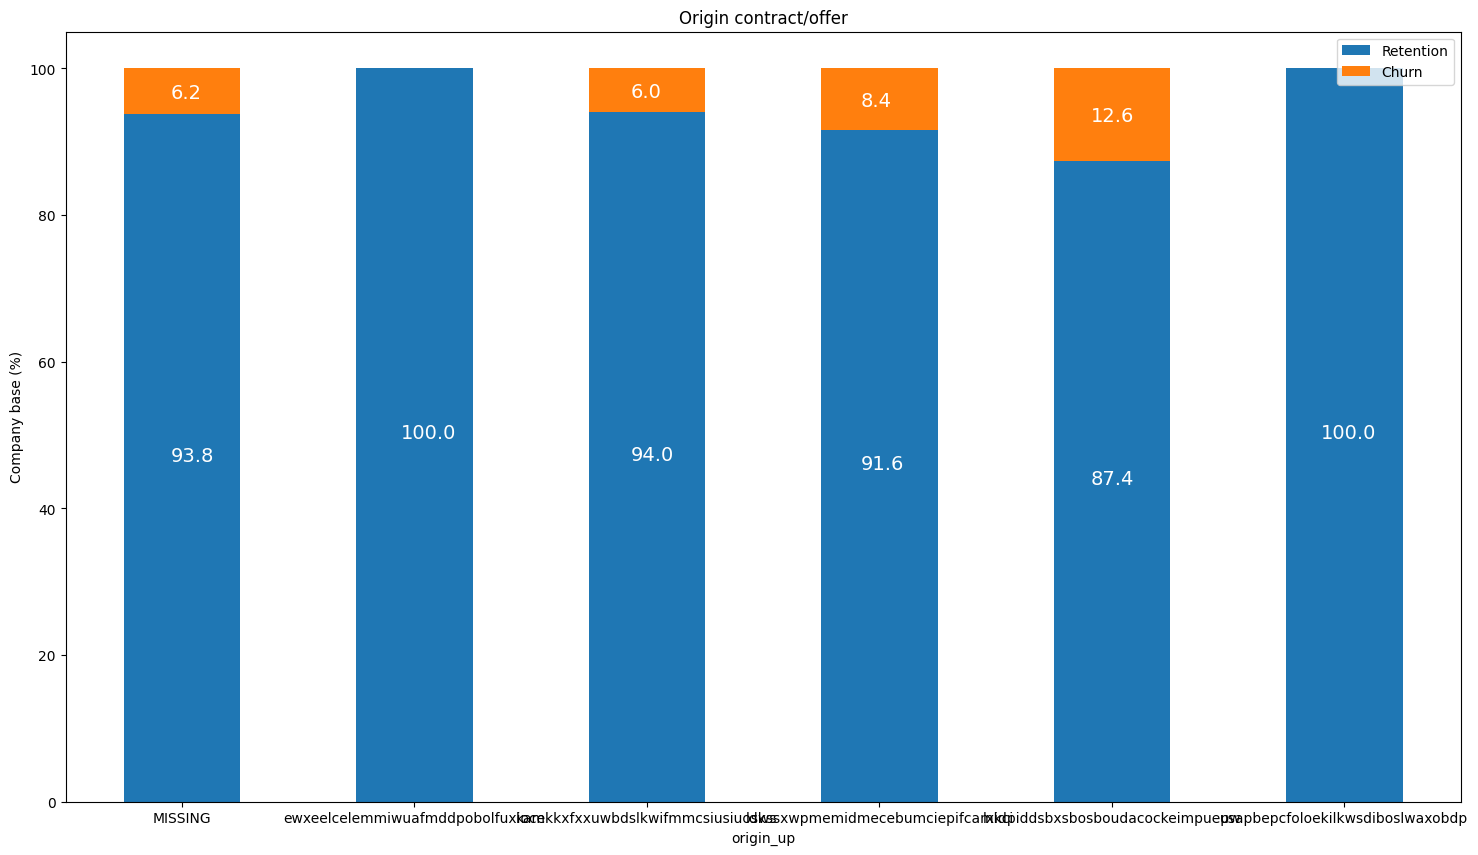

In [65]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

#### Hypothesis Investigation

In [66]:
# Transform date columns to datetime type
client_data["date_activ"] = pd.to_datetime(client_data["date_activ"],format='%Y-%m-%d')
client_data["date_end"] = pd.to_datetime(client_data["date_end"], format='%Y-%m-%d')
client_data["date_modif_prod"] = pd.to_datetime(client_data["date_modif_prod"],format='%Y-%m-%d')
client_data["date_renewal"] = pd.to_datetime(client_data["date_renewal"],format='%Y-%m-%d')
price_data['price_date'] = pd.to_datetime(price_data['price_date'],format='%Y-%m-%d')

In [72]:
# Create yearly sensitivity features
var_year = price_data.groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()
var_year

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.000688,0.000422,1.563148e-04,3.062232e-02,0.043691,0.051094
16092,fffac626da707b1b5ab11e8431a4d0a2,0.000004,0.000000,0.000000e+00,6.464760e-03,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.000009,0.000006,1.857770e-05,7.211360e-03,0.002638,0.001196
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.000021,0.000006,2.220744e-07,5.428835e-03,0.001954,0.000869


In [73]:
# Create last 6 months sensitivity features
var_6m = price_data[price_data['price_date'] > '2015-06-01'].groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()
var_6m

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000
1,0004351ebdd665e6ee664792efc4fd13,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000
4,00114d74e963e47177db89bc70108537,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000
16092,fffac626da707b1b5ab11e8431a4d0a2,0.000003,0.000000,0.000000e+00,0.009482,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.000014,0.000004,3.406563e-07,0.007962,0.002867,0.001274


In [74]:
# Rename columns
var_year = var_year.rename(columns={
"price_off_peak_var": "var_year_price_p1_var",
"price_peak_var": "var_year_price_p2_var",
"price_mid_peak_var": "var_year_price_p3_var",
"price_off_peak_fix": "var_year_price_p1_fix",
"price_peak_fix": "var_year_price_p2_fix",
"price_mid_peak_fix": "var_year_price_p3_fix"})

In [76]:
var_6m = var_6m.rename(columns={
"price_off_peak_var": "var_6m_price_p1_var",
"price_peak_var": "var_6m_price_p2_var",
"price_mid_peak_var": "var_6m_price_p3_var",
"price_off_peak_fix": "var_6m_price_p1_fix",
"price_peak_fix": "var_6m_price_p2_fix",
"price_mid_peak_fix": "var_6m_price_p3_fix"})

In [77]:
var_year["var_year_price_p1"] = var_year["var_year_price_p1_var"] + var_year["var_year_price_p1_fix"]
var_year["var_year_price_p2"] = var_year["var_year_price_p2_var"] + var_year["var_year_price_p2_fix"]
var_year["var_year_price_p3"] = var_year["var_year_price_p3_var"] + var_year["var_year_price_p3_fix"]

In [78]:
var_6m["var_6m_price_p1"] = var_6m["var_6m_price_p1_var"] + var_6m["var_6m_price_p1_fix"]
var_6m["var_6m_price_p2"] = var_6m["var_6m_price_p2_var"] + var_6m["var_6m_price_p2_fix"]
var_6m["var_6m_price_p3"] = var_6m["var_6m_price_p3_var"] + var_6m["var_6m_price_p3_fix"]

In [79]:
var_year

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.000688,0.000422,1.563148e-04,3.062232e-02,0.043691,0.051094,0.031311,0.044114,0.051251
16092,fffac626da707b1b5ab11e8431a4d0a2,0.000004,0.000000,0.000000e+00,6.464760e-03,0.000000,0.000000,0.006469,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.000009,0.000006,1.857770e-05,7.211360e-03,0.002638,0.001196,0.007221,0.002644,0.001215
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.000021,0.000006,2.220744e-07,5.428835e-03,0.001954,0.000869,0.005450,0.001960,0.000869


In [80]:
var_6m

,id,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10
4,00114d74e963e47177db89bc70108537,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10
16092,fffac626da707b1b5ab11e8431a4d0a2,0.000003,0.000000,0.000000e+00,0.009482,0.000000,0.000000,0.009485,0.000000,0.000000e+00
16093,fffc0cacd305dd51f316424bbb08d1bd,0.000011,0.000003,4.860000e-10,0.000000,0.000000,0.000000,0.000011,0.000003,4.860000e-10
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.000014,0.000004,3.406563e-07,0.007962,0.002867,0.001274,0.007976,0.002870,1.274558e-03


In [81]:
# Merge into 1 dataframe
price_features = pd.merge(var_year, var_6m, on='id')

In [83]:
price_features.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00


Now lets merge in the churn data and see whether price sensitivity has any correlation with churn

In [84]:
price_analysis = pd.merge(price_features, client_data[['id', 'churn']], on='id')
price_analysis.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0


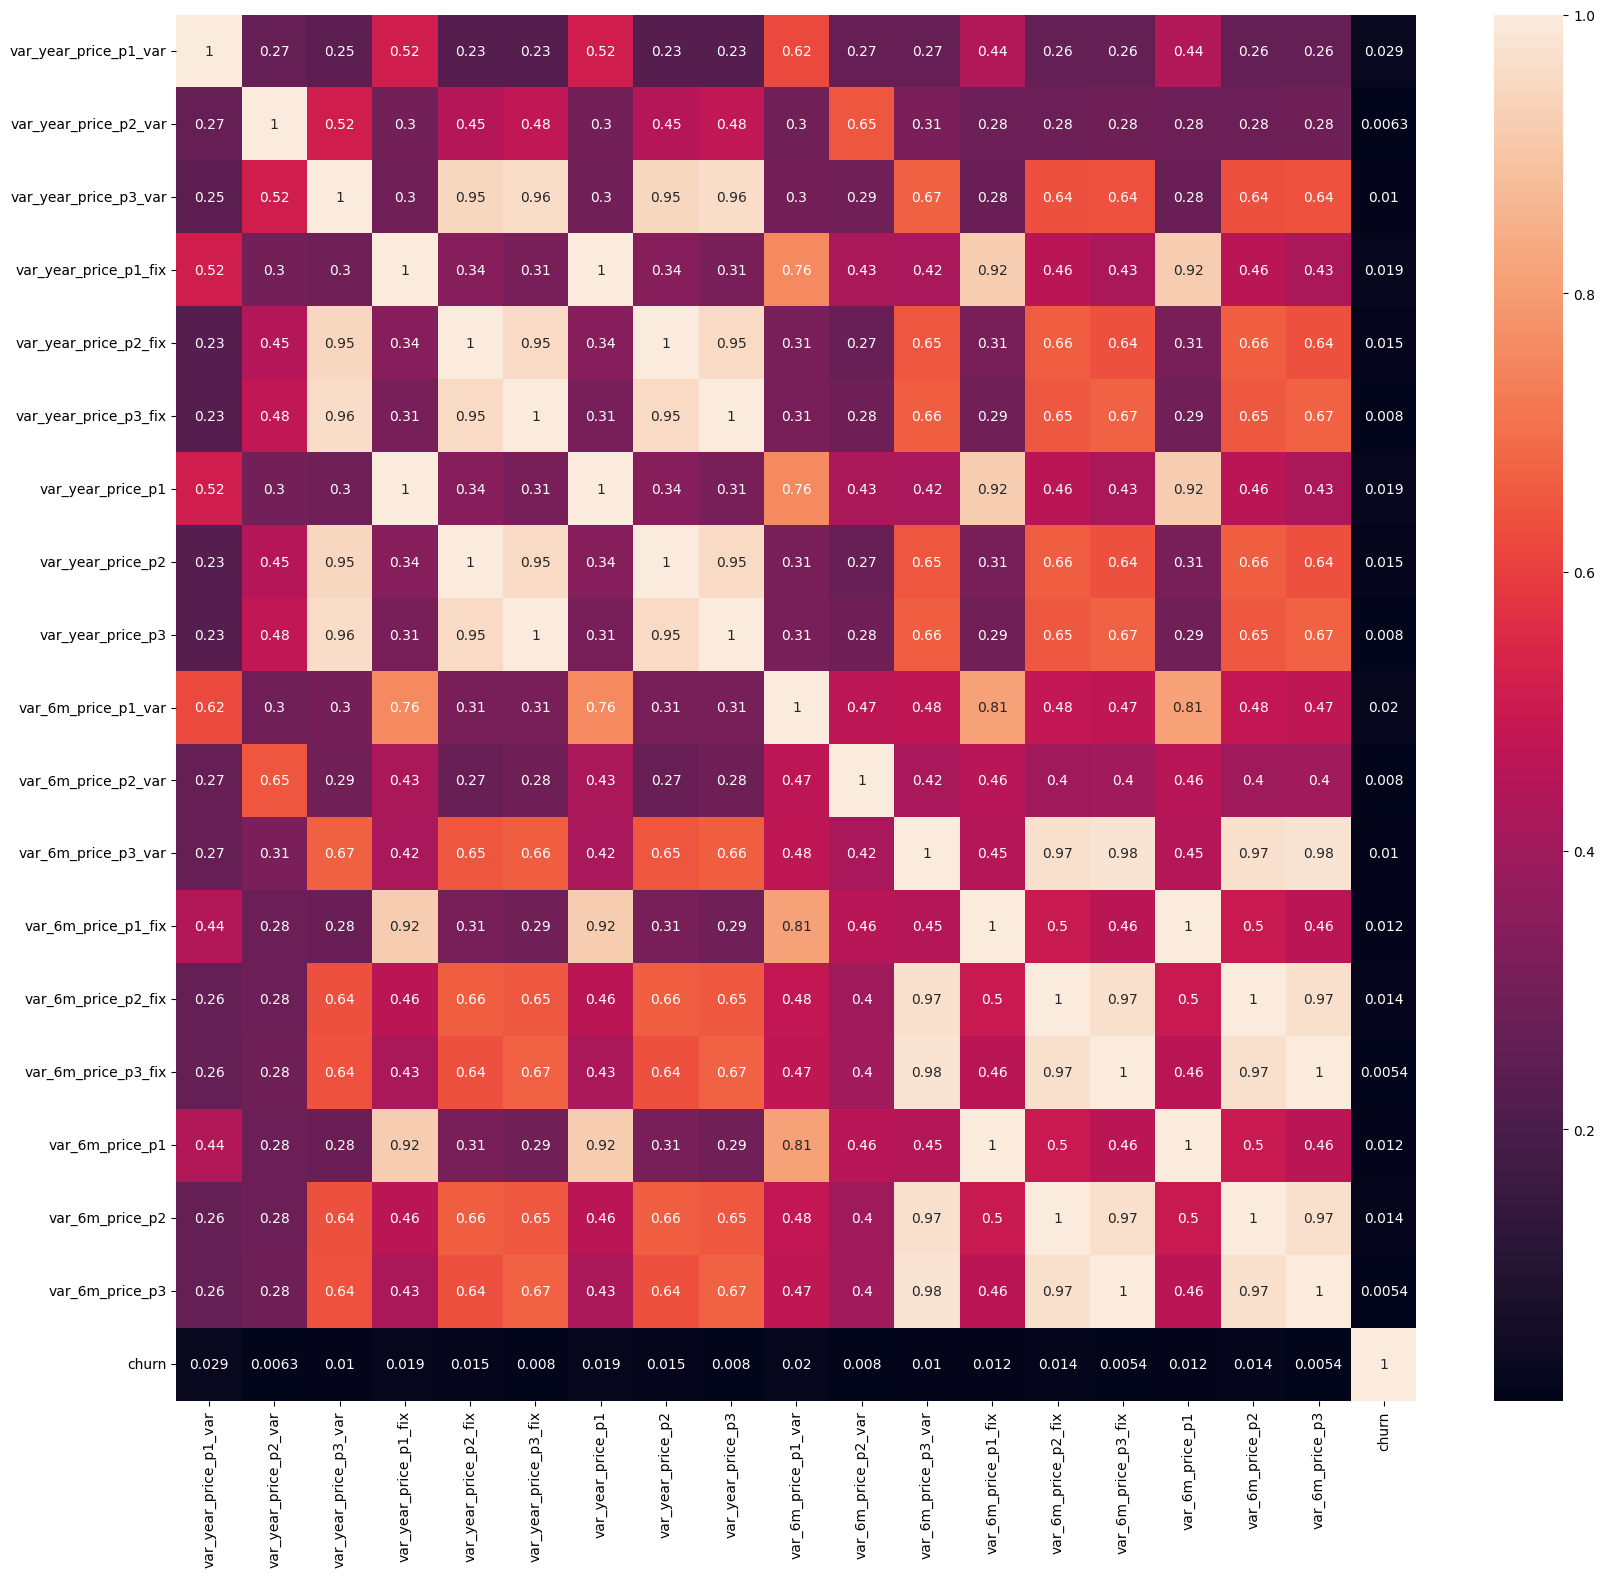

In [85]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation plot, it shows that the price sensitivity features a high inter-correlation with each other, but overall the correlation with churn is very low. This indicates that there is a weak linear relationship between price sensitity and churn. This suggests that for price sensivity to be a major driver for predicting churn, we may need to engineer the features differently.

In [87]:
merged_data = pd.merge(client_data.drop(columns=['churn']), price_analysis,on='id')

In [88]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [89]:
merged_data.to_csv('clean_data_after_eda.csv')